In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import random

In [2]:
# creating the world
def make_SWN(L, Z, p):

  # set graph
  G = nx.Graph()
  nodes = [i for i in range(L)]

  # set nodes
  for i in nodes:
    G.add_node(i)

  # set neighbors
  for i in range(L):
    for j in range(-int(Z/2), 0):
      G.add_edge(nodes[i], nodes[i+j])

  # set random paths
  for edges in range(int(p * L * Z / 2)):
    i = random.randint(0,L-1)
    j = random.randint(0,L-1)

    while(i==j):
      j = random.randint(0,L-1)

    G.add_edge(nodes[i], nodes[j])

  return G

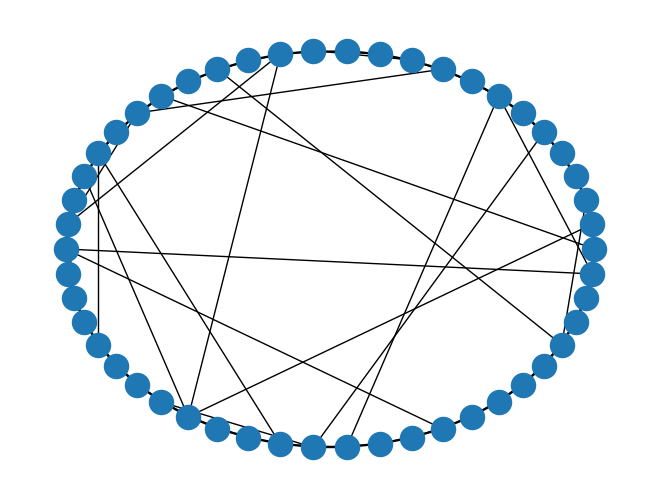

In [3]:
# set parameters
L = 50
Z = 4
p = 0.2
G = make_SWN(L, Z, p)
nx.draw_circular(G)

In [4]:
# methods
def find_path_length_from_node(graph, node):

  lengths = [-1] * len(graph)
  unvisited = [True] * len(graph)
  following = []
  current = [node]
  d = 0

  while(any(unvisited)):
    for i in current:

      if unvisited[i]:

        unvisited[i] = False
        lengths[i] = d
        following.append(i)

        following = following + list(graph.neighbors(i))

    d = d + 1
    current = following
    following = []

  return lengths

In [5]:
def find_all_path_lengths(graph):

  all_lengths = []

  for i in graph.nodes:
    l = find_path_length_from_node(graph, i)
    all_lengths = all_lengths + l[i:]

  return all_lengths

def test_find_all():

  fa1 = find_all_path_lengths(make_SWN(1000, 10, 0))
  fa2 = find_all_path_lengths(make_SWN(1000, 10, 0))

  if not len(fa1) == 1001 * 500:
    return False

  if not fa1 == fa2:
    return False

  return True

test_find_all()

True

In [6]:
for p in [x/10 for x in range(10)]:

  g = make_SWN(1000, 2, p)
  lengths = find_all_path_lengths(g)

  print("p = {}".format(p))

  nx.draw_circular(g)
  plt.show()

  plt.hist(lengths)
  plt.show()

Output hidden; open in https://colab.research.google.com to view.

Increasing the probability of random connections reduce the average distance between notes quite significantly. While it took p = .8 to reach a average distance close to 6, this would be significantly reduced with a greater Z (nearest neighbors connected).

In [7]:
def find_average_path_length(graph):
  f = find_all_path_lengths(graph)
  return sum(f) / len(f)

In [8]:
acc = 0
for i in range(100):
  g = make_SWN(100, 2, 0.1)
  lengths = find_all_path_lengths(g)
  acc += sum(lengths) / len(lengths)

print('Average distance for 100 nodes with 2 neighbors and p = .1')
print(acc/100)

Average distance for 100 nodes with 2 neighbors and p = .1
9.688154455445542


N = 100, Z = 2


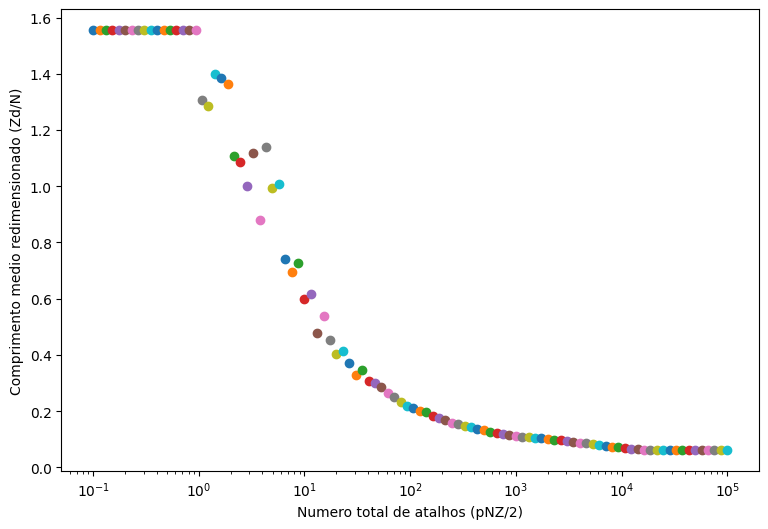

N = 100, Z = 4


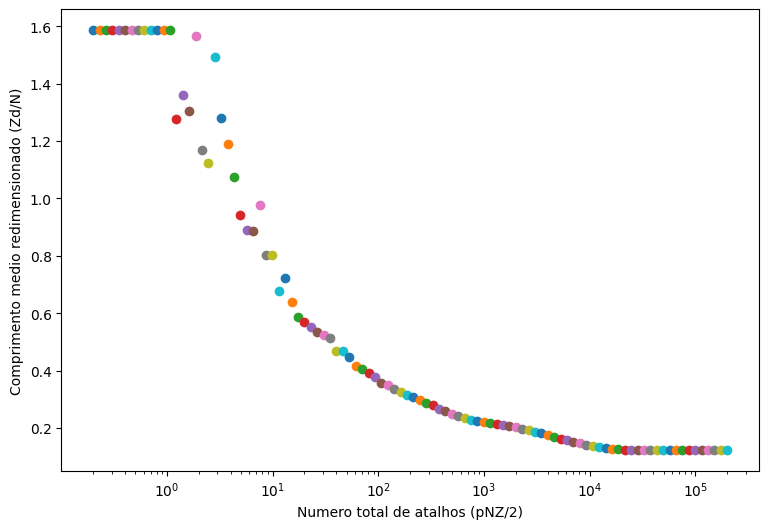

N = 200, Z = 2


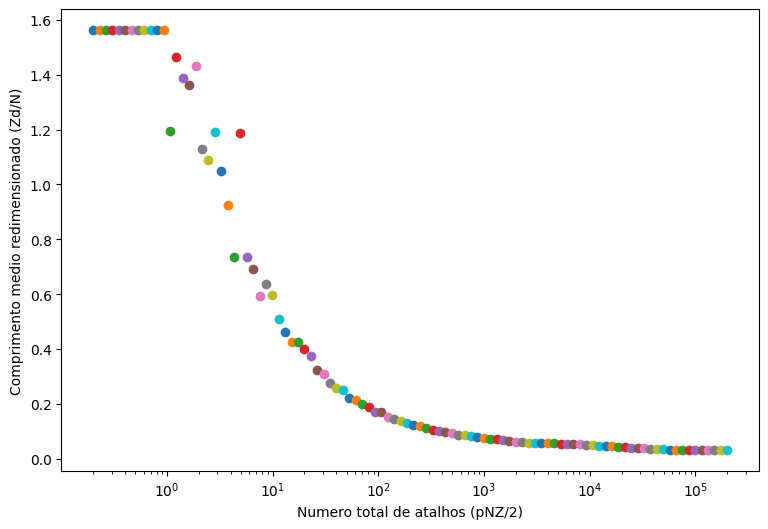

N = 200, Z = 4


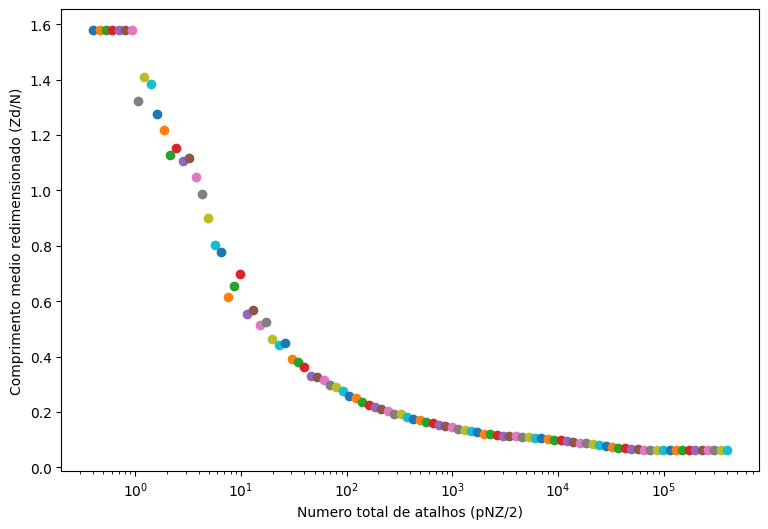

In [9]:
import numpy as np

for n in [100,200]:
  for z in [2,4]:

    print("N = " + str(n) +", Z = " + str(z))
    fig, ax = plt.subplots(figsize = (9, 6))

    for p in np.logspace(-3, 3, 100):
      d = find_average_path_length(make_SWN(n, z, p))
      ax.scatter(p*n*z/2, np.pi*z*d/n)

    ax.set_xlabel("Numero total de atalhos (pNZ/2)")
    ax.set_ylabel("Comprimento medio redimensionado (Zd/N)")
    ax.set_xscale("log")

    plt.show()